CUSTOMER SEGMENTATION OF CREDIT CARD

IMPORTING LIBRARY AND READ A CSV FILE DATASET 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot

In [5]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
creditcard_df = pd.read_csv('Marketing_data.csv')
print(creditcard_df)
creditcard_df.info()

     CUST_ID        BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001      40.900749           0.818182      95.40              0.00   
1     C10002    3202.467416           0.909091       0.00              0.00   
2     C10003    2495.148862           1.000000     773.17            773.17   
3     C10004    1666.670542           0.636364    1499.00           1499.00   
4     C10005     817.714335           1.000000      16.00             16.00   
...      ...            ...                ...        ...               ...   
8946  C19187      19.183215           1.000000     300.00              0.00   
8947  C19188      23.398673           0.833333     144.40              0.00   
8948  C19189      13.457564           0.833333       0.00              0.00   
8949  C19190     372.708075           0.666667    1093.25           1093.25   
8950     0.0  545565.000000                NaN        NaN               NaN   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHAS

CALCULATE AVRAGE MINIMUM AND MAXIMUM BALANCE OF A CUSTOMER

In [6]:
print('Average, min, max =', creditcard_df['BALANCE'].mean(), creditcard_df['BALANCE'].min(), creditcard_df['BALANCE'].max())

Average, min, max = 1625.2502187151156 0.0 545565.0


In [7]:
print(creditcard_df.describe())

             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    8951.000000        8950.000000   8950.000000       8950.000000   
mean     1625.250219           0.877271   1003.204834        592.437371   
std      6115.074447           0.236904   2136.634782       1659.887917   
min         0.000000           0.000000      0.000000          0.000000   
25%       128.309871           0.888889     39.635000          0.000000   
50%       873.680279           1.000000    361.280000         38.000000   
75%      2054.678104           1.000000   1110.130000        577.405000   
max    545565.000000           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000         

In [8]:
print(creditcard_df['CASH_ADVANCE'].max())

47137.21176


In [9]:
creditcard_df[creditcard_df['CASH_ADVANCE']==47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123.0,21.0,19600.0,39048.59762,5394.173671,0.0,12.0


# VISUALIZE AND EXPLORE DATASET
# There case sensitive error and also many data colors

<AxesSubplot:>

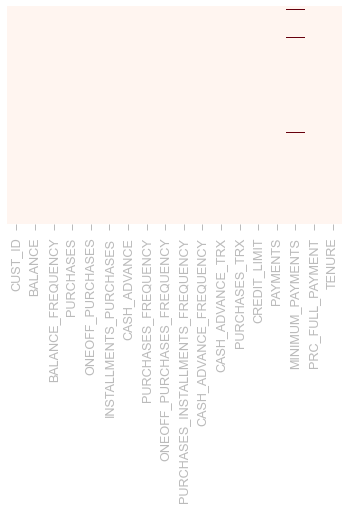

In [10]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False,cbar=False,cmap='Reds')

In [11]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     1
PURCHASES                             1
ONEOFF_PURCHASES                      1
INSTALLMENTS_PURCHASES                1
CASH_ADVANCE                          1
PURCHASES_FREQUENCY                   1
ONEOFF_PURCHASES_FREQUENCY            1
PURCHASES_INSTALLMENTS_FREQUENCY      1
CASH_ADVANCE_FREQUENCY                1
CASH_ADVANCE_TRX                      1
PURCHASES_TRX                         1
CREDIT_LIMIT                          2
PAYMENTS                              1
MINIMUM_PAYMENTS                    314
PRC_FULL_PAYMENT                      1
TENURE                                1
dtype: int64

# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'

In [12]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['BALANCE_FREQUENCY'].isnull()==True),'BALANCE_FREQUENCY']=creditcard_df['BALANCE_FREQUENCY'].mean()
creditcard_df.loc[(creditcard_df['PURCHASES'].isnull()==True),'PURCHASES']=creditcard_df['PURCHASES'].mean()
creditcard_df.loc[(creditcard_df['ONEOFF_PURCHASES'].isnull()==True),'ONEOFF_PURCHASES']=creditcard_df['ONEOFF_PURCHASES'].mean()
creditcard_df.loc[(creditcard_df['CASH_ADVANCE'].isnull()==True),'CASH_ADVANCE']=creditcard_df['CASH_ADVANCE'].mean()
creditcard_df.loc[(creditcard_df['PURCHASES_FREQUENCY'].isnull()==True),'PURCHASES_FREQUENCY']=creditcard_df['PURCHASES_FREQUENCY'].mean()
creditcard_df.loc[(creditcard_df['ONEOFF_PURCHASES_FREQUENCY'].isnull()==True),'ONEOFF_PURCHASES_FREQUENCY']=creditcard_df['ONEOFF_PURCHASES_FREQUENCY'].mean()
creditcard_df.loc[(creditcard_df['PURCHASES_INSTALLMENTS_FREQUENCY'].isnull()==True),'PURCHASES_INSTALLMENTS_FREQUENCY']=creditcard_df['PURCHASES_INSTALLMENTS_FREQUENCY'].mean()
creditcard_df.loc[(creditcard_df['CASH_ADVANCE_FREQUENCY'].isnull()==True),'CASH_ADVANCE_FREQUENCY']=creditcard_df['CASH_ADVANCE_FREQUENCY'].mean()
creditcard_df.loc[(creditcard_df['CASH_ADVANCE_TRX'].isnull()==True),'CASH_ADVANCE_TRX']=creditcard_df['CASH_ADVANCE_TRX'].mean()
creditcard_df.loc[(creditcard_df['PURCHASES_TRX'].isnull()==True),'PURCHASES_TRX']=creditcard_df['PURCHASES_TRX'].mean()
creditcard_df.loc[(creditcard_df['PAYMENTS'].isnull()==True),'PAYMENTS']=creditcard_df['PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['PRC_FULL_PAYMENT'].isnull()==True),'PRC_FULL_PAYMENT']=creditcard_df['PRC_FULL_PAYMENT'].mean()
creditcard_df.loc[(creditcard_df['PAYMENTS'].isnull()==True),'PAYMENTS']=creditcard_df['PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['TENURE'].isnull()==True),'TENURE']=creditcard_df['TENURE'].mean()
creditcard_df.loc[(creditcard_df['INSTALLMENTS_PURCHASES'].isnull()==True),'INSTALLMENTS_PURCHASES']=creditcard_df['INSTALLMENTS_PURCHASES'].mean()

In [13]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        2
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=creditcard_df['CREDIT_LIMIT'].mean()

In [15]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
creditcard_df.duplicated().sum()

0

# IF we see that our Dataset There is no meaning of Customer ID so we drop the customer id from Dataset.

In [23]:
creditcard_df.drop('CUST_ID',axis=1,inplace=True)

In [24]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


# Find the number of Column in Dataset

In [25]:
n=len(creditcard_df.columns)
print(n)

17


In [26]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [27]:
x=creditcard_df['BALANCE'].mean()
print(x)

1625.2502187151156


c:\Users\Alice\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Alice\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Alice\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

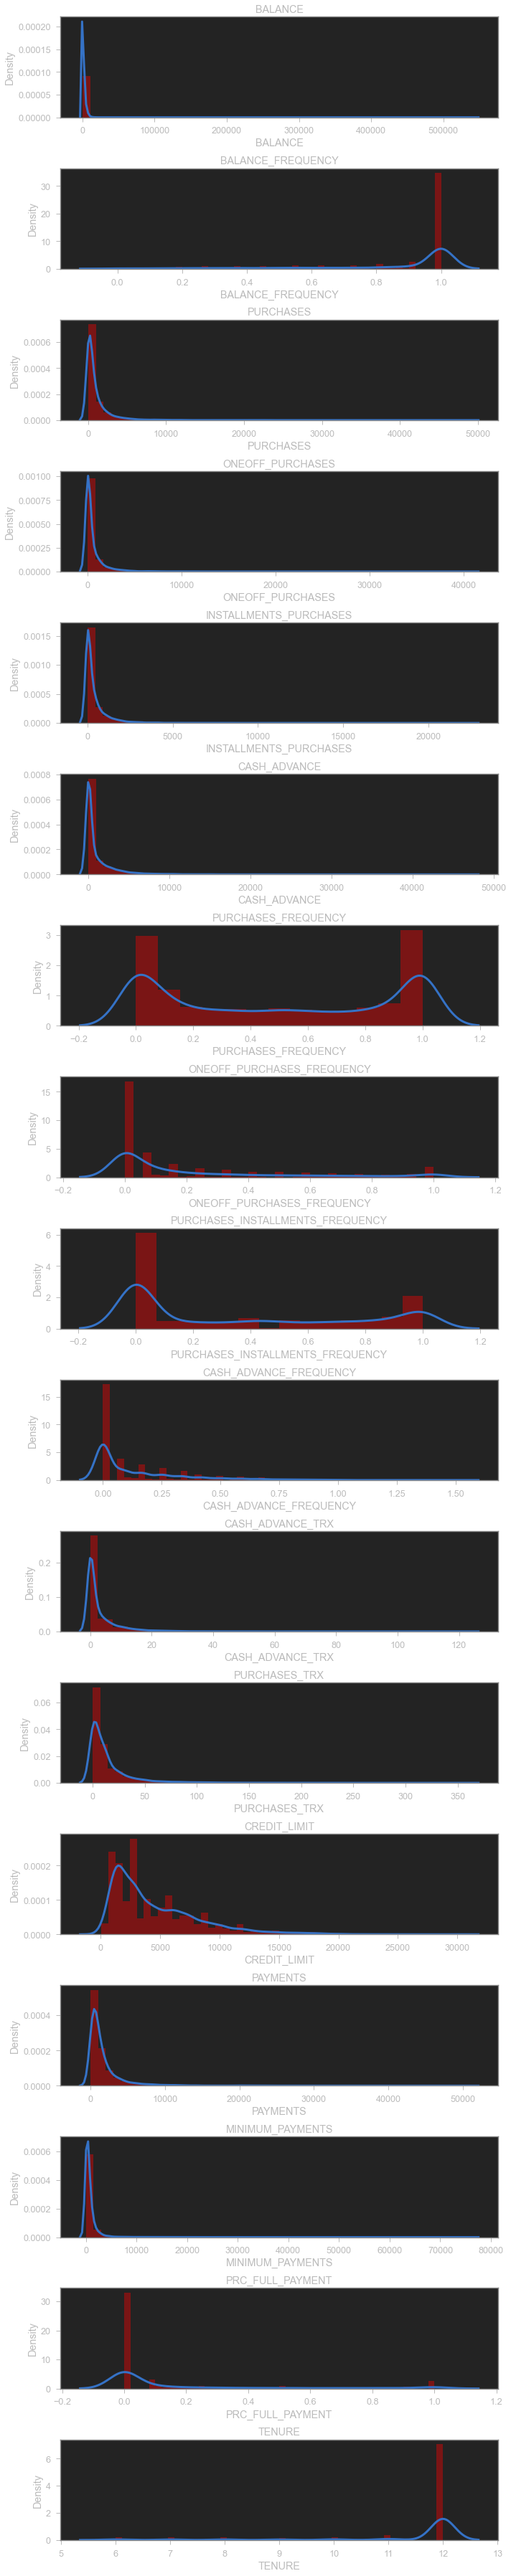

In [28]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "red"})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

# Correlation

In [29]:
correlations=creditcard_df.corr()
print(correlations)

                                   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.109741   0.061697   
BALANCE_FREQUENCY                 0.109741           1.000000   0.133674   
PURCHASES                         0.061697           0.133674   1.000000   
ONEOFF_PURCHASES                  0.055940           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.043047           0.124292   0.679896   
CASH_ADVANCE                      0.169061           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.026530           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.024904           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.021507           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.152902           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.131096           0.141555  -0.067175   
PURCHASES_TRX                     0.052533           0.189626   0.689561   
CREDIT_LIMIT

<AxesSubplot:>

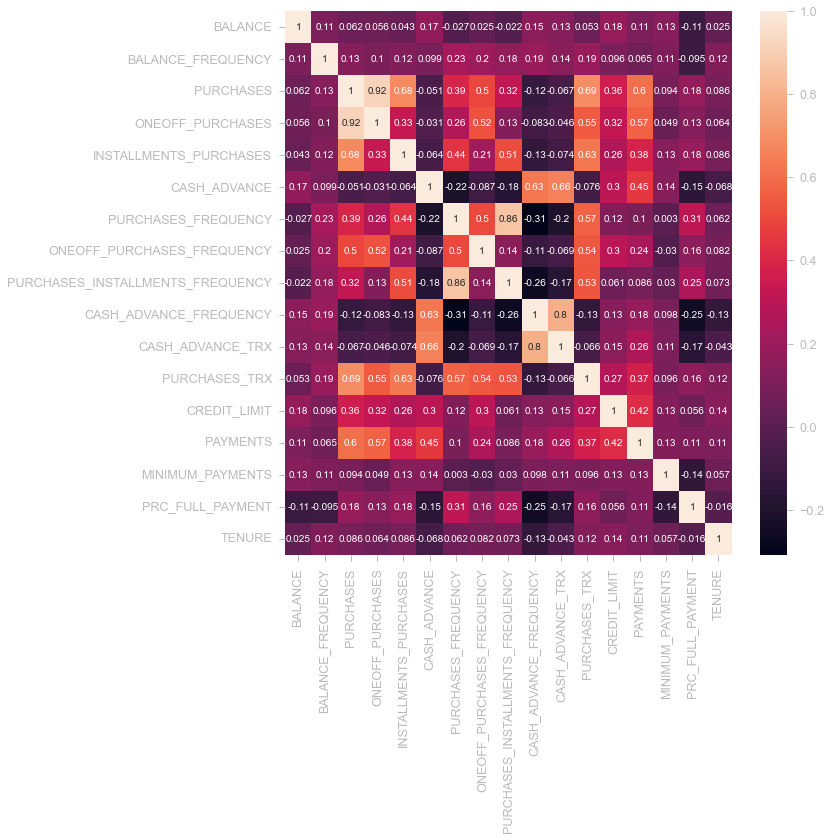

In [30]:
correlations=creditcard_df.corr()
a,ax=plt.subplots(figsize=(10,10))
sns.heatmap(correlations,annot=True)

# UNDERSTAND THE THEORY AND IMPLIMENT BY K-MEANS ALGORITHM 


# Find the optimal Number of cluster using ELBOW Method.

# There we got error that is "ValueError: could not convert string to float: 'C10001'" Then we restart the kernal

In [31]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [32]:
creditcard_df_scaled.shape

(8951, 17)

In [33]:
creditcard_df_scaled


array([[-2.59103629e-01, -2.49448415e-01, -4.24923472e-01, ...,
        -3.10984921e-01, -5.25580331e-01,  3.60699693e-01],
       [ 2.57937221e-01,  1.34332175e-01, -4.69578113e-01, ...,
         8.93151983e-02,  2.34239982e-01,  3.60699693e-01],
       [ 1.42262739e-01,  5.18112765e-01, -1.07674245e-01, ...,
        -1.01668861e-01, -5.25580331e-01,  3.60699693e-01],
       ...,
       [-2.63591672e-01, -1.85487094e-01, -4.69578113e-01, ...,
        -3.46925858e-01,  3.29218376e-01, -4.12299788e+00],
       [-2.04840044e-01, -8.89082732e-01,  4.21481615e-02, ...,
        -3.32965019e-01, -5.25580331e-01, -4.12299788e+00],
       [ 8.89556033e+01, -4.68690721e-16,  5.32143078e-17, ...,
         4.87857742e-17,  0.00000000e+00,  0.00000000e+00]])

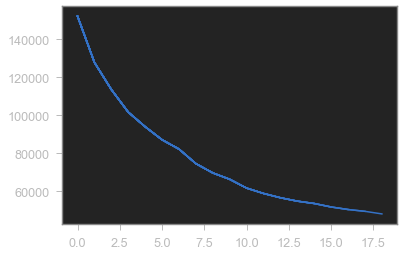

In [34]:
score=[]
range_value=range(1,20)
for i in range_value:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    score.append(kmeans.inertia_)
    plt.plot(score,'bx-')
    # plt.show()

# Apply KMEANS METHODE

In [35]:
kmeans=KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels=kmeans.labels_

In [36]:
kmeans.cluster_centers_.shape

(7, 17)

In [37]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[creditcard_df.columns])
print(cluster_centers)

     BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0  -0.247427     -2.142757e+00 -3.121896e-01        -0.231837   
1   0.453178      3.367681e-01 -2.225732e-01        -0.156682   
2   0.489256      4.050254e-01  7.336018e+00         6.378655   
3   0.038331      4.243661e-01  9.549615e-01         0.910178   
4  88.955603     -4.686907e-16  5.321431e-17         0.000000   
5  -0.126695      3.160133e-01 -6.094450e-02        -0.241973   
6   0.004689      3.718379e-01 -3.434990e-01        -0.222014   

  INSTALLMENTS_PURCHASES  CASH_ADVANCE PURCHASES_FREQUENCY  \
0          -3.121419e-01 -3.117744e-01           -0.557554   
1          -2.384863e-01  2.026527e+00           -0.490891   
2           5.624267e+00  4.266778e-03            1.094939   
3           5.858048e-01 -2.952899e-01            1.089889   
4          -6.286340e-17  5.421586e-17            0.000000   
5           3.003964e-01 -3.576667e-01            0.970297   
6          -4.042227e-01 -8.264517e-02       

In [38]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[creditcard_df.columns])
print(cluster_centers)

         BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0     112.299331          0.369700    336.244236       207.657114   
1    4396.310690          0.957044    527.700328       332.391934   
2    4616.917429          0.973212  16675.845600     11179.106800   
3    1859.634233          0.977794   3043.380813      2103.062652   
4  545565.000000          0.877271   1003.204834       592.437371   
5     850.544939          0.952127    873.003248       190.834009   
6    1653.923286          0.965351    269.355002       223.960423   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             128.817378   325.102240            0.266590   
1             195.419508  5228.355269            0.293343   
2            5496.738800   987.818246            0.929778   
3             940.774088   359.668975            0.927751   
4             411.067645   978.871112            0.490351   
5             682.697239   228.869312            0.879756   
6              45.55

In [39]:
labels.shape

(8951,)

In [40]:
labels.max()

6

In [41]:
labels.min()

0

In [42]:
y_kmeans=kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([3, 1, 2, ..., 3, 3, 5])

In [43]:
creditcard_df_cluster=pd.concat([creditcard_df,pd.DataFrame({'cluster':labels})],axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,6


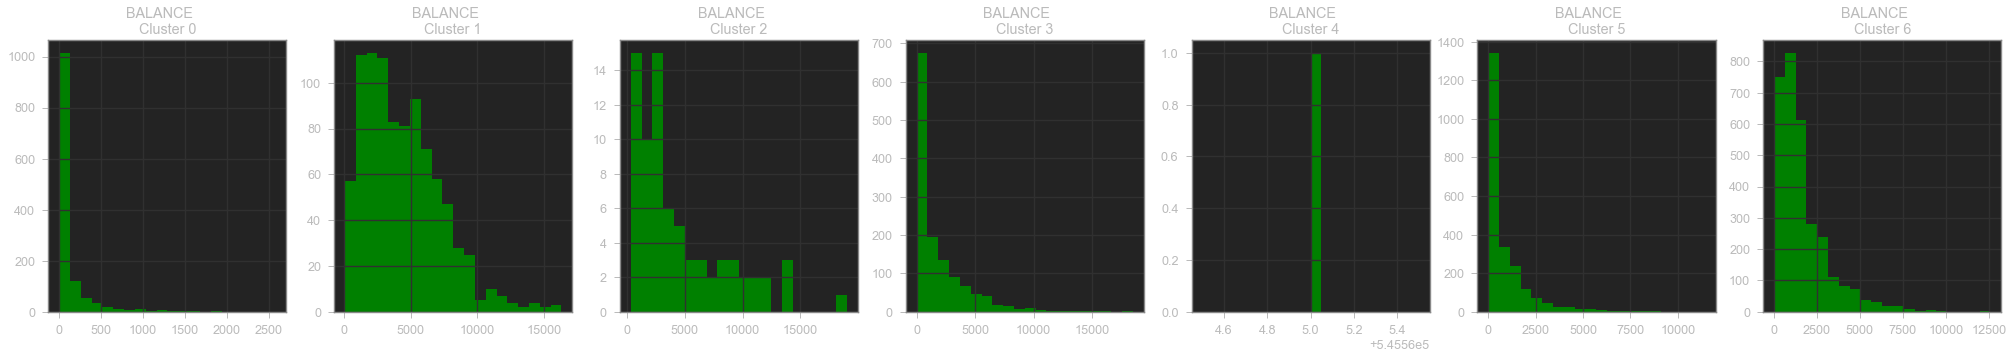

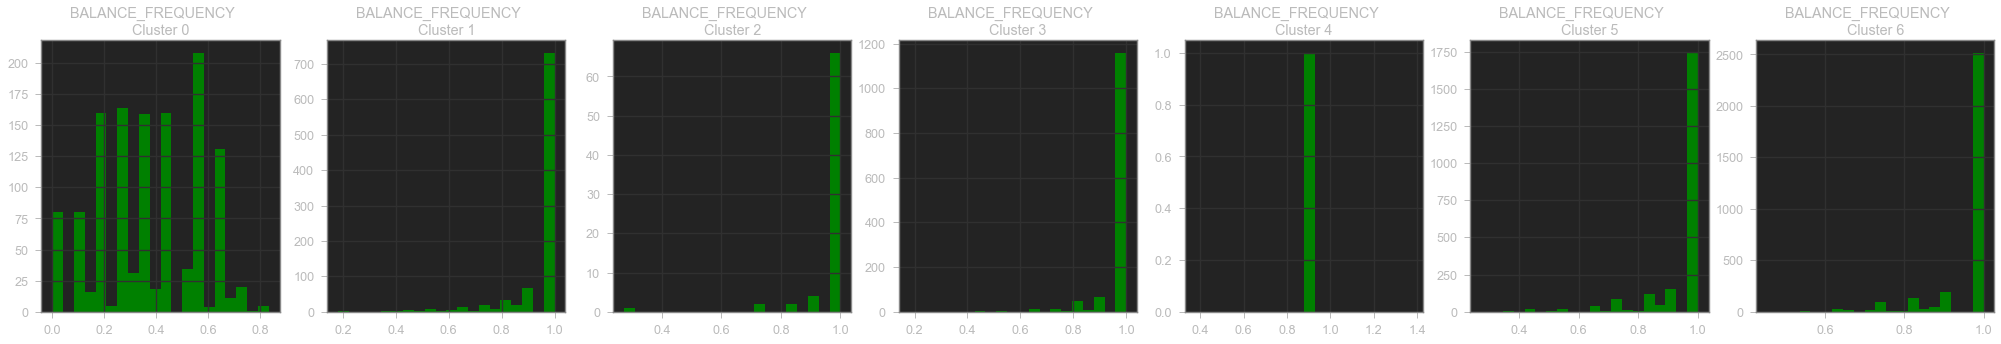

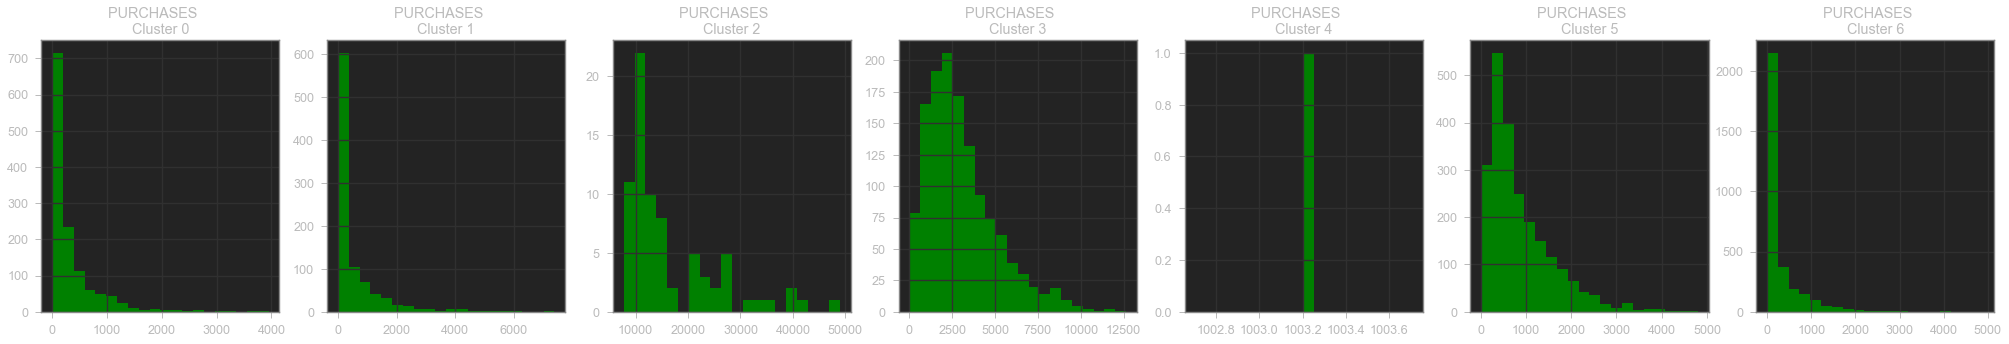

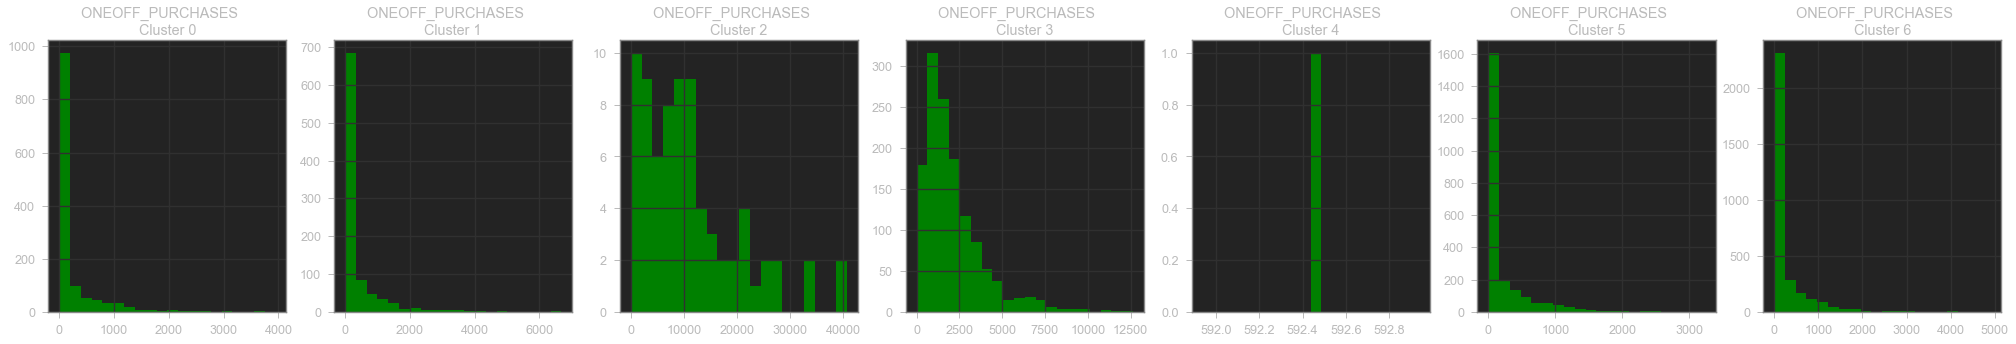

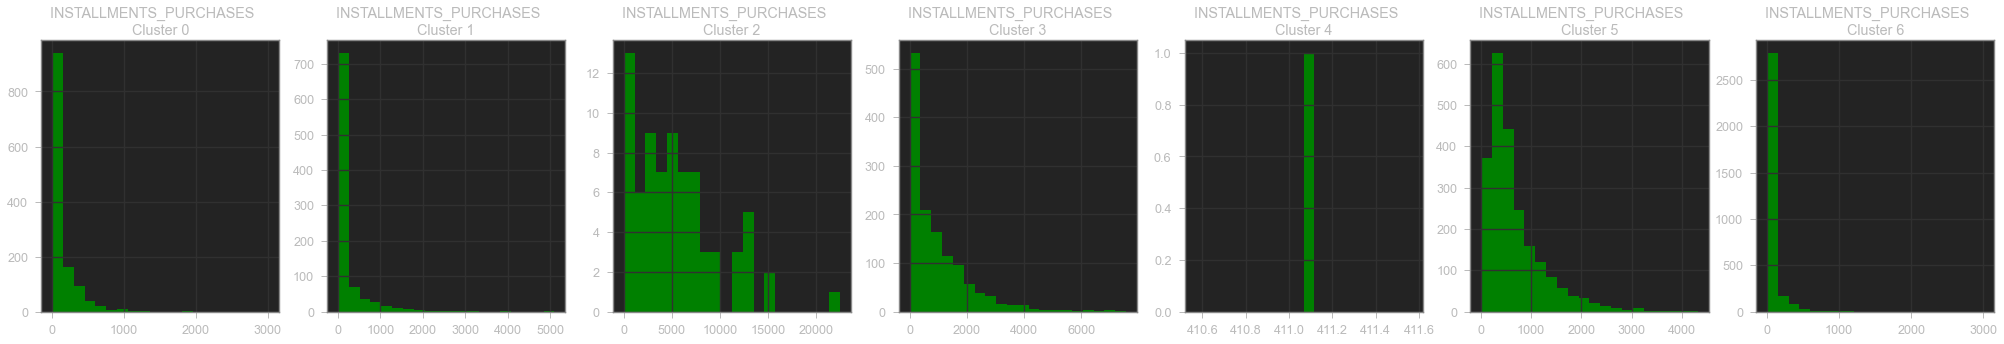

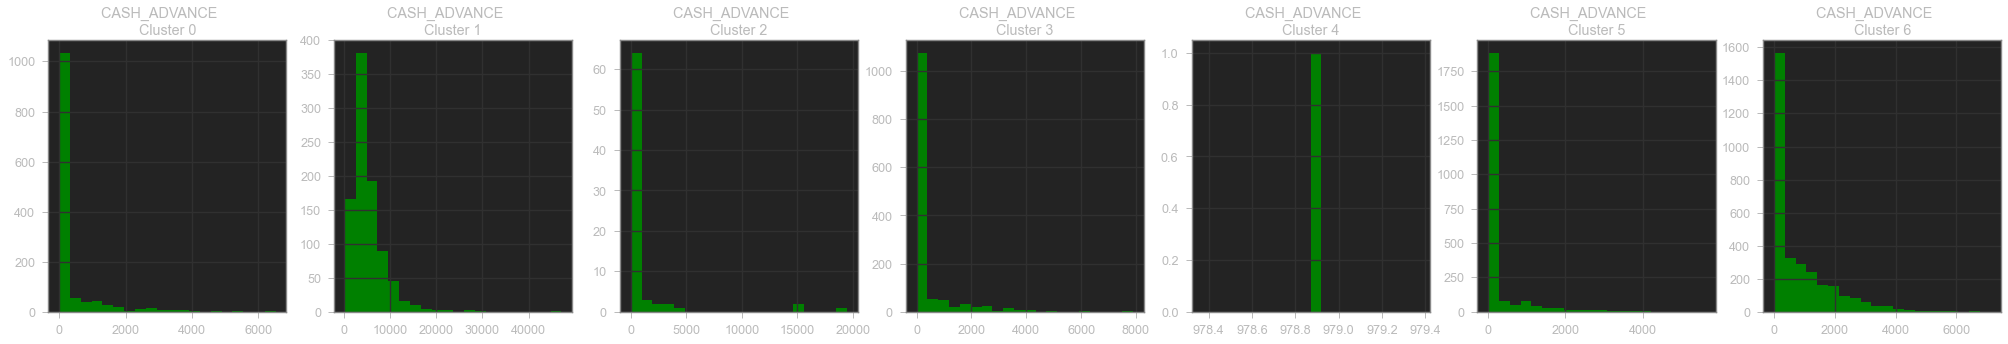

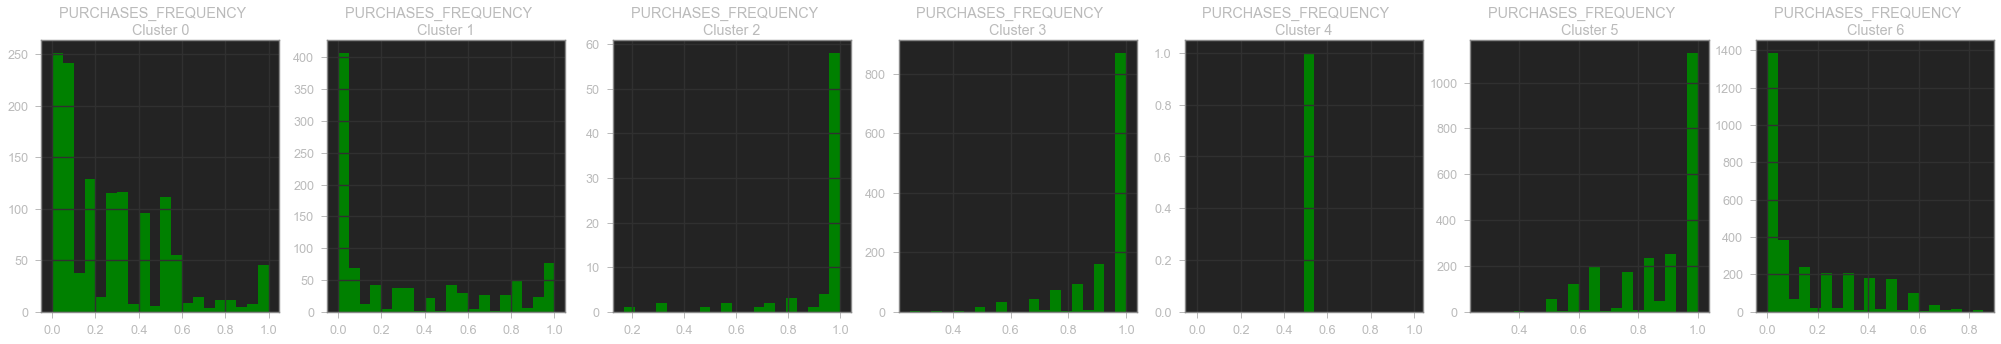

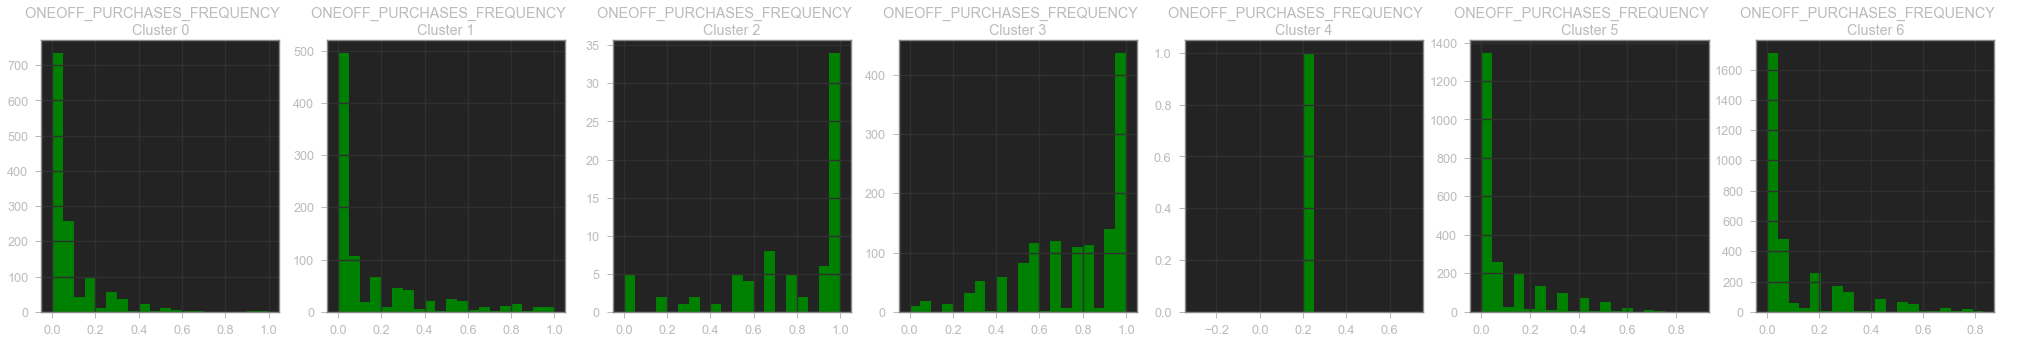

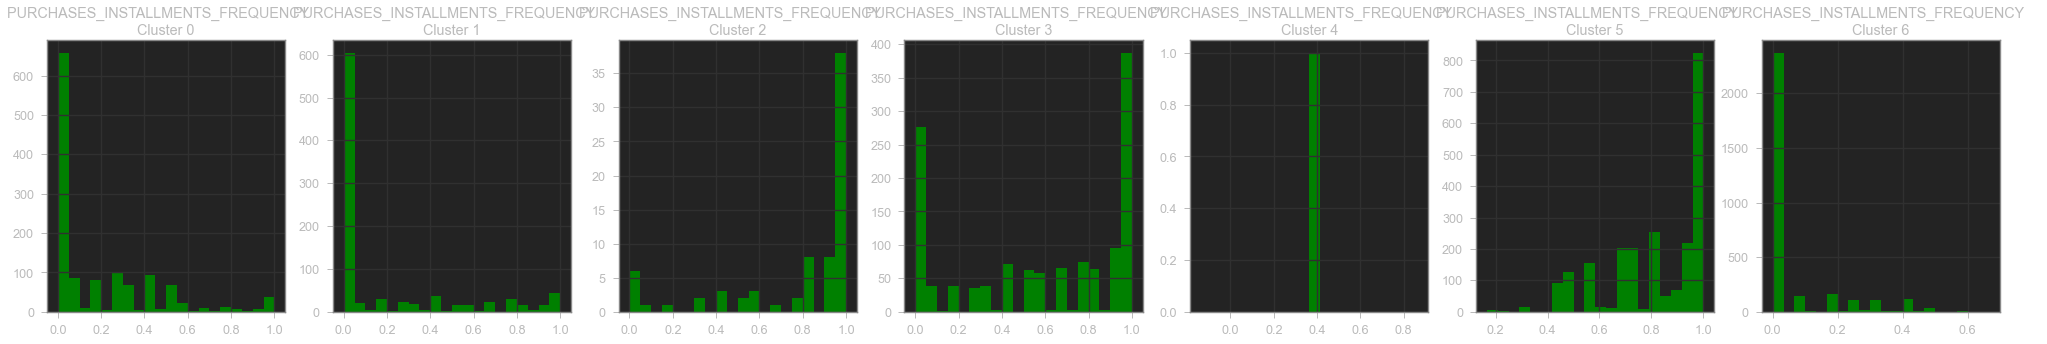

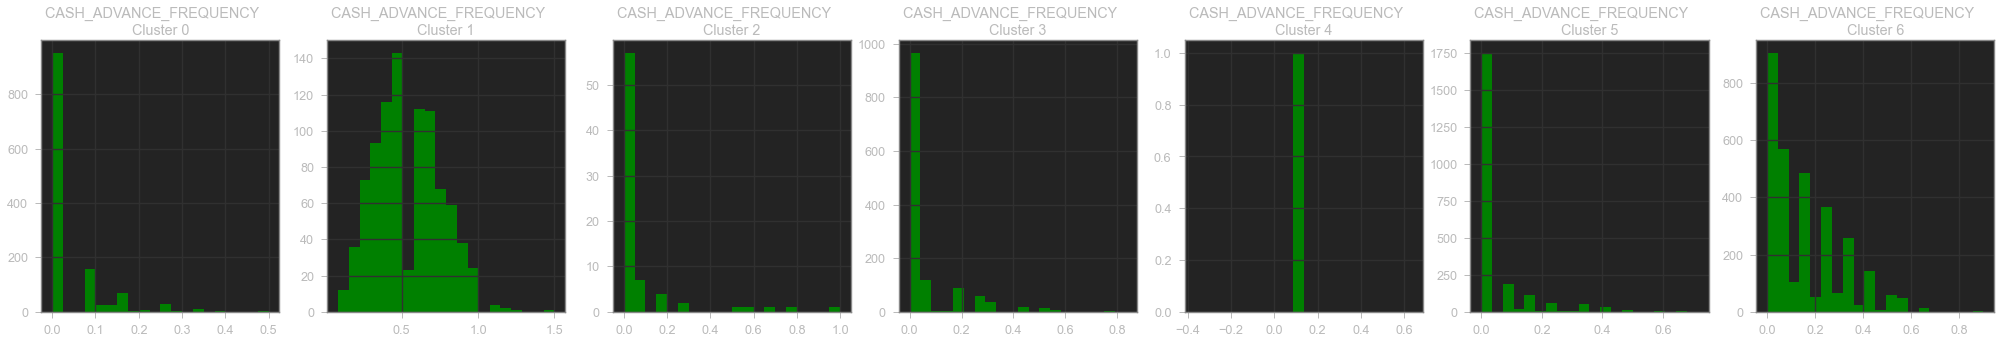

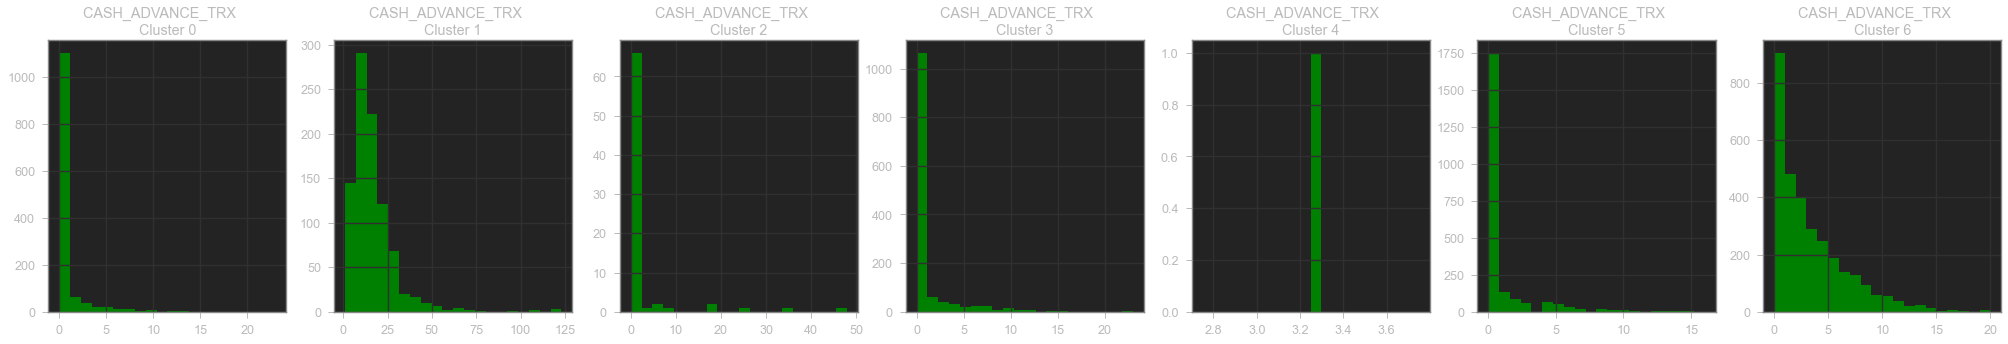

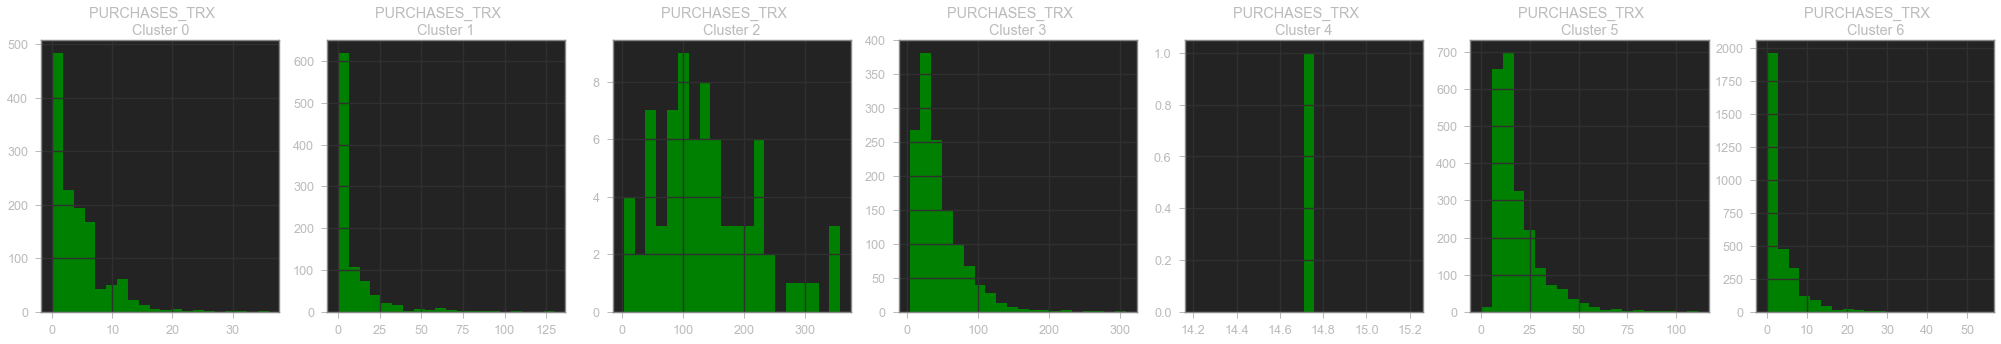

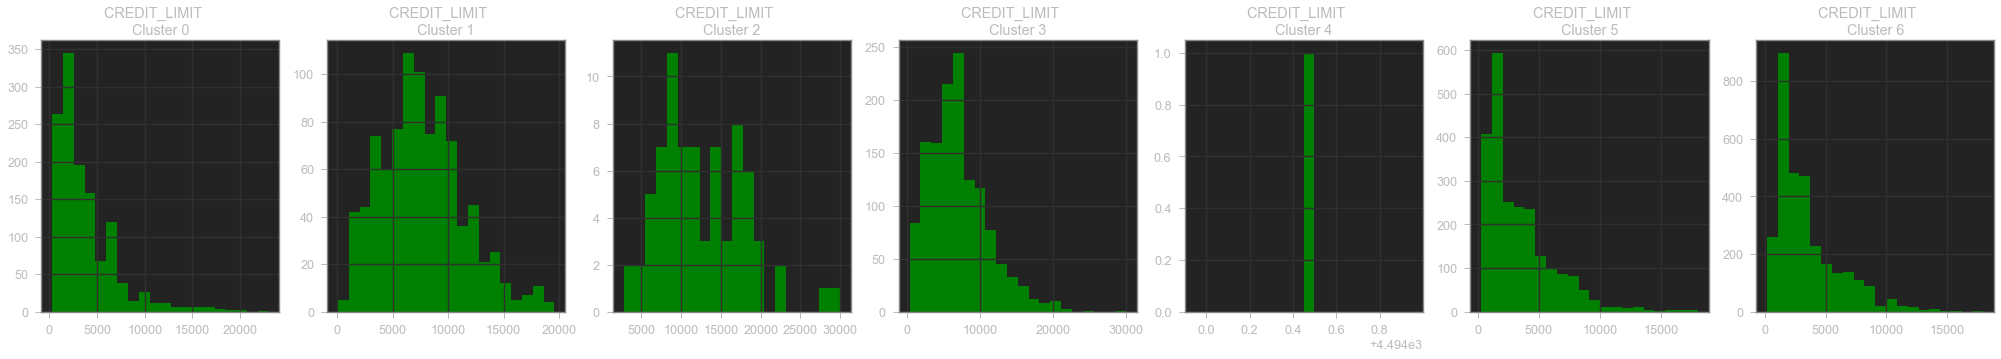

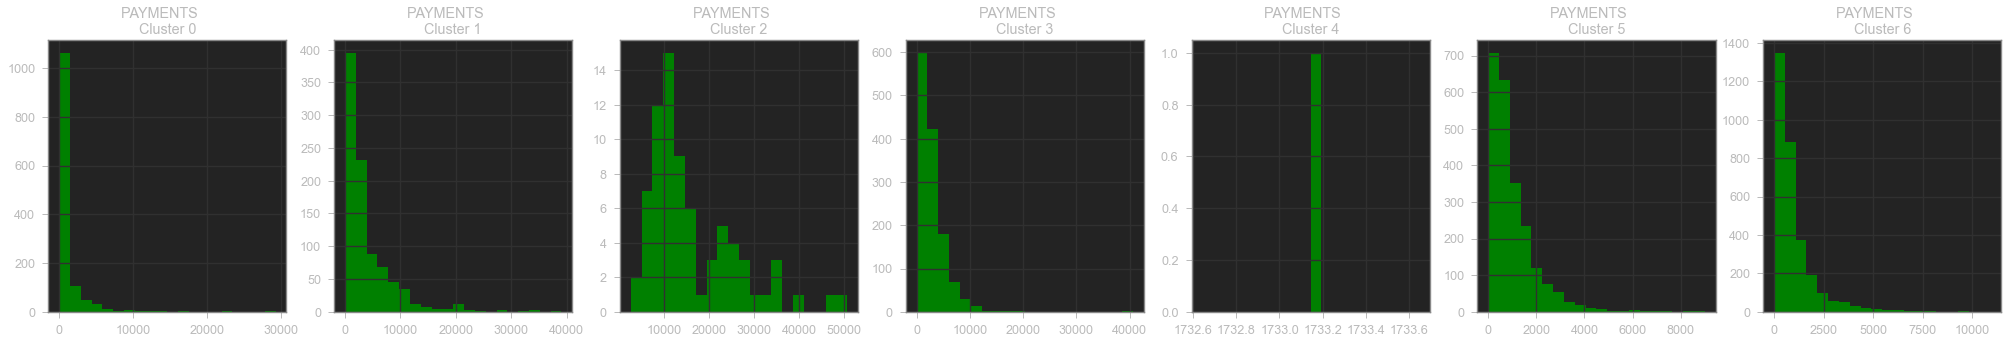

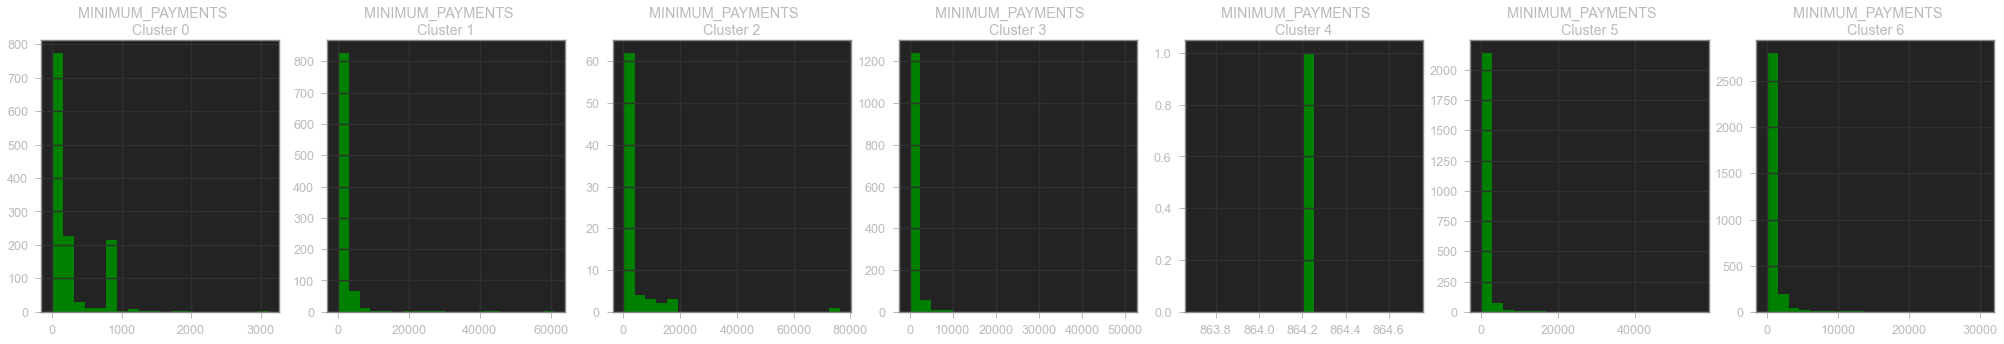

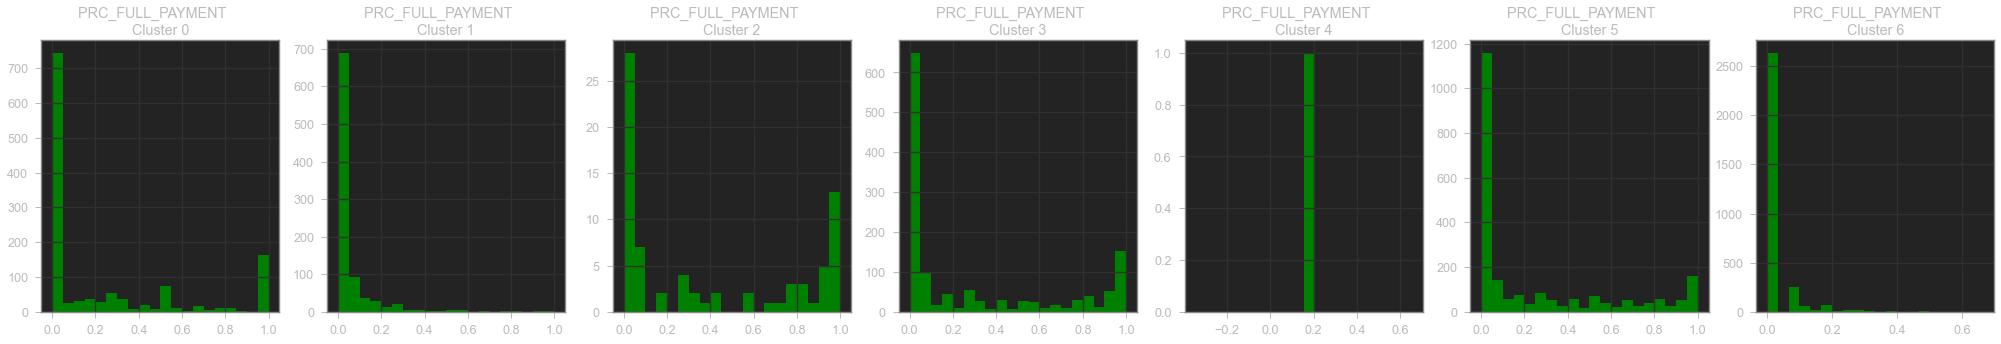

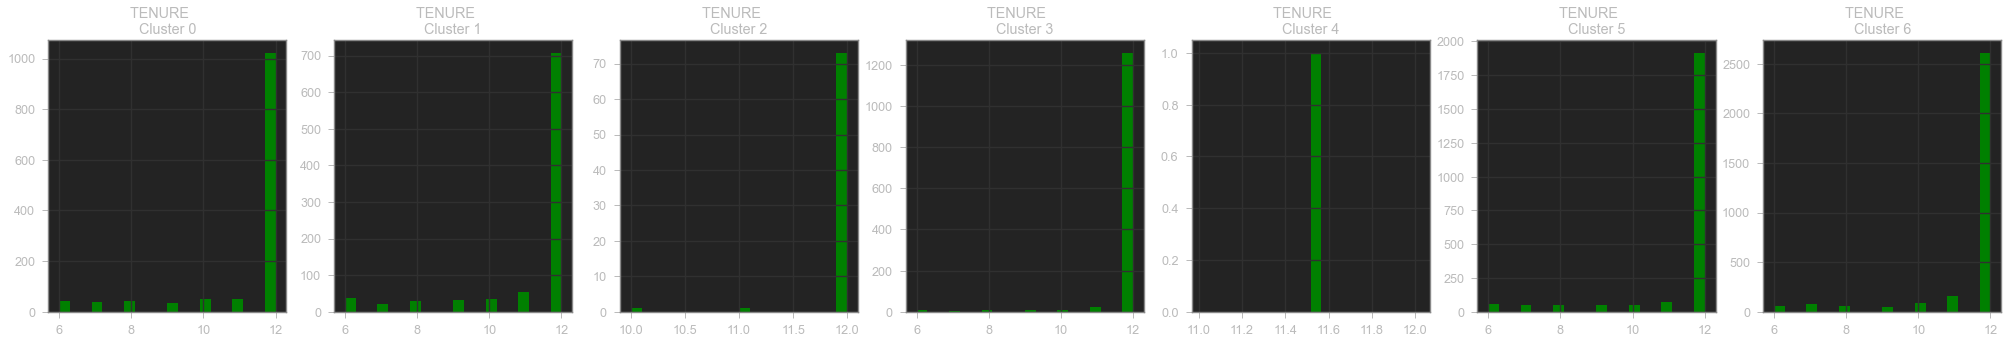

In [44]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster=creditcard_df_cluster[creditcard_df_cluster['cluster']==j]
        cluster[i].hist(bins=20,color='Green')
        plt.title('{}    \nCluster {}'.format(i,j))
    plt.show()

PRINCIPLE COMPONENT ANALYSIS (PCA)

In [46]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.56445137, -1.0451034 ],
       [-1.3543223 ,  2.29153076],
       [ 0.96095309, -0.54189229],
       ...,
       [-2.23737049, -0.55859878],
       [-0.48439287, -0.16625725],
       [ 2.51628441, 16.00923834]])

# Create a Dataframe with the two component

In [47]:
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.564451,-1.045103
1,-1.354322,2.291531
2,0.960953,-0.541892
3,-0.881758,-0.071629
4,-1.532788,-0.777920


In [48]:
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.564451,-1.045103,6
1,-1.354322,2.291531,1
2,0.960953,-0.541892,3
3,-0.881758,-0.071629,6
4,-1.532788,-0.777920,6


 PCA

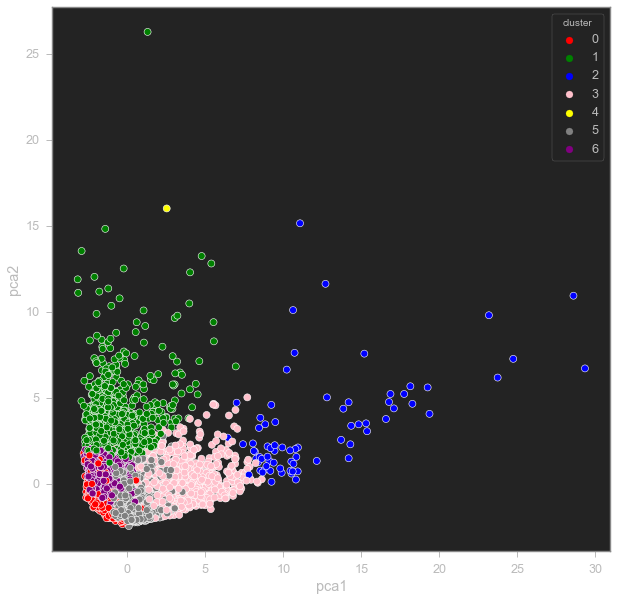

In [49]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2",hue="cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()